# Linear Regression Assignment
## Delivery Time
Predict delivery time using sorting time 

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Exploring Data

In [15]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
data.rename(columns={'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'}, inplace=True)

In [17]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [18]:
data.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

Adding more columns to check logarithmic and square root relations

In [19]:
data['log_DeliveryTime'] = np.log(data['DeliveryTime'])
data['sqrt_DeliveryTime'] = np.sqrt(data['DeliveryTime'])

Checking linearity of data through visual

Text(0.5, 1.0, 'SortingTime vs square root of DeliveryTime')

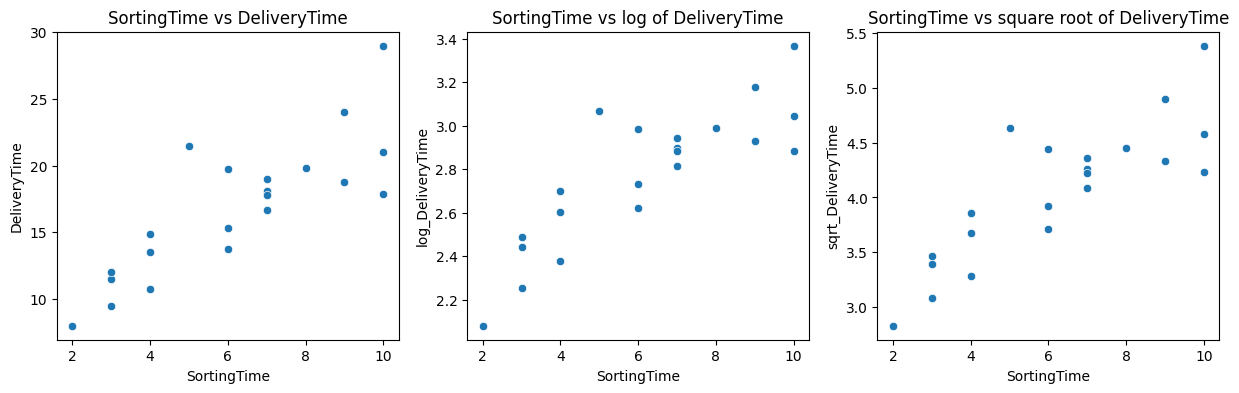

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x='SortingTime', y='DeliveryTime')
plt.title('SortingTime vs DeliveryTime')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x='SortingTime', y='log_DeliveryTime')
plt.title('SortingTime vs log of DeliveryTime')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x='SortingTime', y='sqrt_DeliveryTime')
plt.title('SortingTime vs square root of DeliveryTime')

<Axes: xlabel='SortingTime', ylabel='Count'>

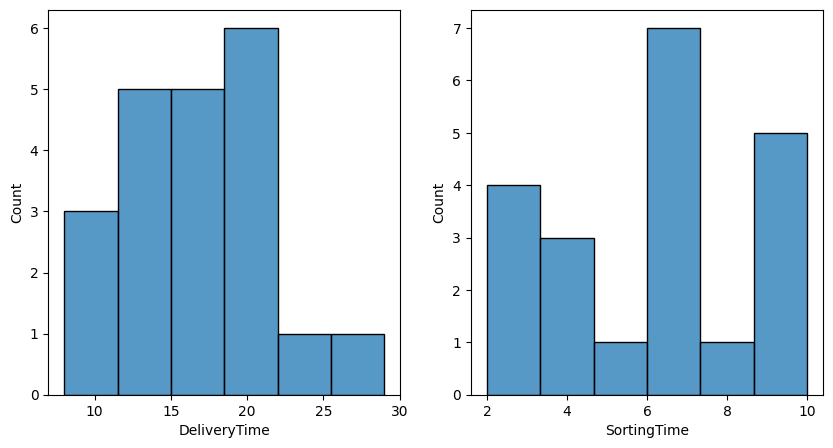

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=data, x='DeliveryTime')
plt.subplot(1,2,2)
sns.histplot(data=data, x='SortingTime')

## Building a model
#### Linear target model

In [21]:
import statsmodels.formula.api as smf
linear_model= smf.ols('DeliveryTime~SortingTime',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

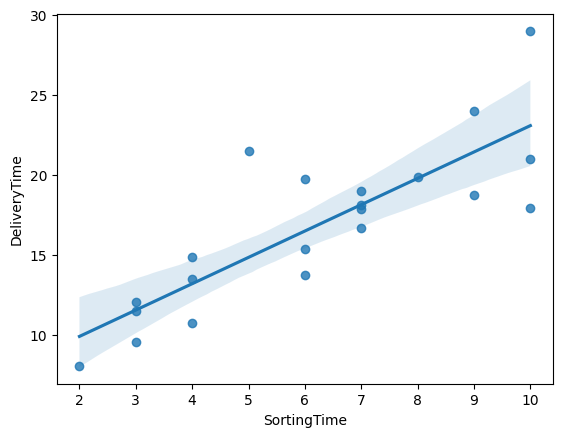

In [22]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=data)

#### Log of target model

<Axes: xlabel='SortingTime', ylabel='log_DeliveryTime'>

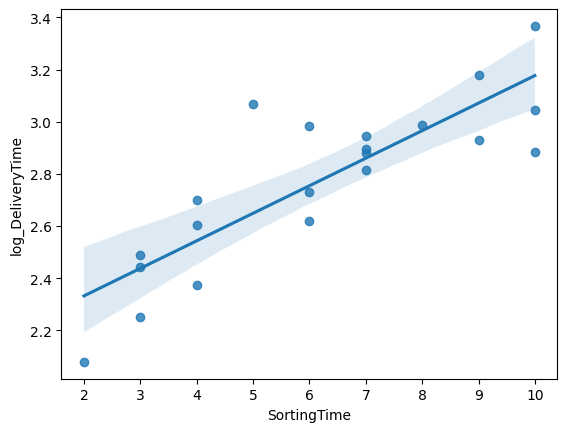

In [23]:
log_model= smf.ols('log_DeliveryTime~SortingTime', data=data).fit()
sns.regplot(x='SortingTime', y='log_DeliveryTime', data=data)

#### Square root of target model

<Axes: xlabel='SortingTime', ylabel='sqrt_DeliveryTime'>

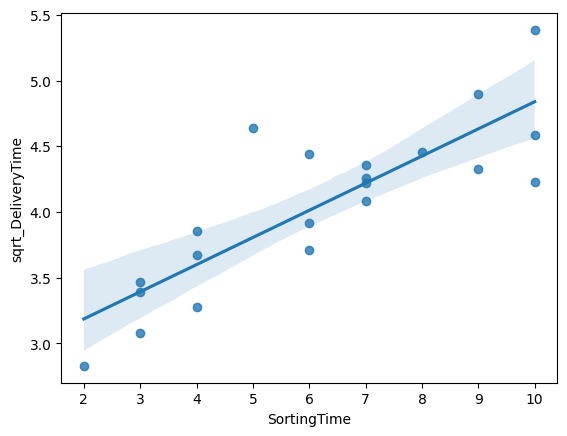

In [24]:
sqrt_model= smf.ols('sqrt_DeliveryTime~SortingTime', data=data).fit()
sns.regplot(x='SortingTime', y='sqrt_DeliveryTime', data=data)

## Metrics
Coparison between all models

In [25]:
models = [linear_model, log_model, sqrt_model]
pd.DataFrame({'Intercept':[model.params[0] for model in models],
              'Slope':[model.params[1] for model in models],
              't-value':[model.tvalues[1] for model in models],
              'p-value':[model.pvalues[1] for model in models],
              'r-square':[model.rsquared for model in models]},
              index=['linear_model','log_model','sqrt_model'])

,Intercept,Slope,t-value,p-value,r-square
linear_model,6.582734,1.649020,6.387447,0.000004,0.682271
log_model,2.121372,0.105552,6.836088,0.000002,0.710948
sqrt_model,2.772731,0.206632,6.723095,0.000002,0.704050


#### Prediction
Making a sample point to test our model's prediction

In [27]:
test_data = pd.DataFrame({'SortingTime':[12,14,20]})

In [28]:
test_data['DeliveryTime'] = linear_model.predict(test_data)
test_data['log_DeliveryTime'] = np.exp(log_model.predict(test_data))
test_data['sqrt_DeliveryTime'] = np.power(sqrt_model.predict(test_data),2)
test_data

,SortingTime,DeliveryTime,log_DeliveryTime,sqrt_DeliveryTime
0,12,26.370973,29.606414,27.586790
1,14,29.669013,36.565100,32.098757
2,20,39.563132,68.882614,47.684099
